In [61]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from pocket_cube.astar import astar

import time

%matplotlib inline

# Creating a scrambled cube 

In [62]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

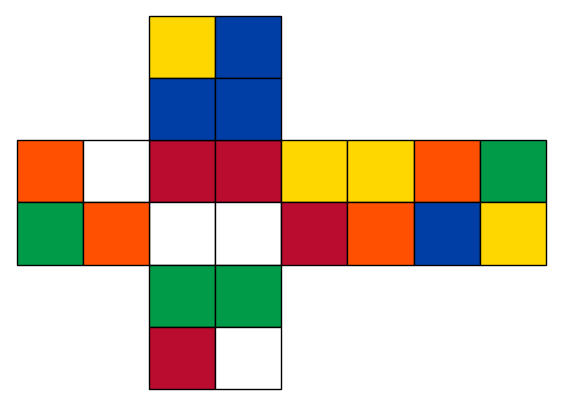

In [63]:
cube.render()

## Text representation 

In [64]:
cube.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

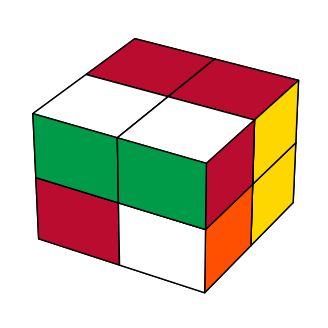

In [65]:
cube.render3D()

# Creating an unscrambled cube 

In [66]:
cube = Cube(scrambled=False)

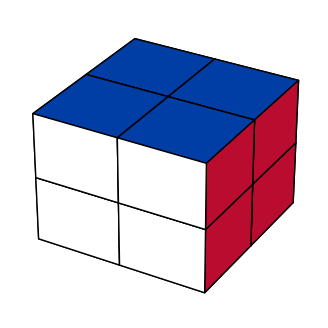

In [67]:
cube.render3D()

## Applying moves on the cube 

In [68]:
cube.scramble()

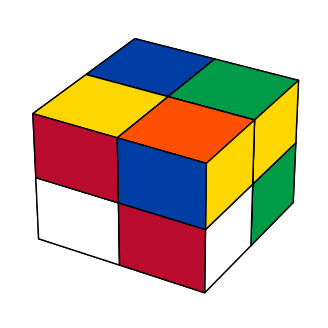

In [69]:
cube.render3D()

## Tests (ascending complexity)

In [70]:
case1 = "R U' R' F' U"
case2 = "F' R U R U F' U'"
case3 = "F U U F' U' R R F' R"
case4 = "U' R U' F' R F F U' F U U"

# A* Algorithm

## Defined a function that will actually apply the solution (list of moves) to the Cube
- Basically it will solve the cube (so we can render the solved cube for example)

In [71]:
def apply_solution(cube, solution_moves):
    """Apply the solution moves to the cube."""
    for move in solution_moves:
        cube.state = Cube.move_state(cube.state, move)

In [72]:
# Run A* algorithm with the defined heuristic
cube_copy = cube.clone()
start_time = time.time()
solution, moves = astar(cube_copy)
end_time = time.time()

# Print the solution and the number of iterations
print("Solution:", [Move(move) for move in solution])
print("Number of moves:", moves)
# Print the execution time
print("Execution Time:", end_time - start_time, "seconds")
apply_solution(cube_copy, solution);

Solution: [<Move.F: 1>, <Move.U: 2>, <Move.R: 0>, <Move.U: 2>, <Move.F: 1>, <Move.Up: 5>, <Move.Rp: 3>, <Move.U: 2>, <Move.R: 0>, <Move.U: 2>, <Move.R: 0>, <Move.F: 1>, <Move.Rp: 3>, <Move.Fp: 4>]
Number of moves: 3926
Execution Time: 4.79184103012085 seconds


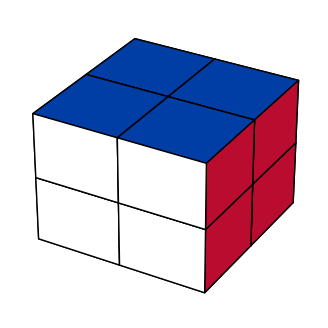

In [73]:
cube_copy.render3D()

## Let's define a function that will test the algorithm using the 4 test cases that we've got

In [74]:
def TestFunction(algorithm):
    print("Running the 4 dificulty tests for the algorithm")
    Test(algorithm, case1, 1)
    Test(algorithm, case2, 2)
    Test(algorithm, case3, 3)
    solution = Test(algorithm, case4, 4)
    # Let's render just most difficult one after solving it
    cube4 = Cube(case4)
    print("Cube4 initial state")
    cube4.render3D()
    apply_solution(cube4, solution);
    print("Cube4 after solving")
    cube4.render3D()
    
def Test(algorithm, test_case, test_number):
    cube = Cube(test_case)
    start_time = time.time()
    solution, moves = algorithm(cube)
    end_time = time.time()
    
    # Print the solution and the number of iterations
    print("TEST " + str(test_number))
    print("Solution:", [Move(move) for move in solution])
    print("Number of states discovered:", moves)
    # Print the execution time
    print("Execution Time:", end_time - start_time, "seconds\n")
    return solution



## A* Algorithm Testing

Running the 4 dificulty tests for the algorithm
TEST 1
Solution: [<Move.F: 1>, <Move.U: 2>, <Move.U: 2>, <Move.R: 0>, <Move.Up: 5>, <Move.Fp: 4>, <Move.U: 2>, <Move.U: 2>, <Move.F: 1>, <Move.U: 2>, <Move.Rp: 3>, <Move.Up: 5>, <Move.R: 0>]
Number of states discovered: 692
Execution Time: 0.8505823612213135 seconds

TEST 2
Solution: [<Move.Fp: 4>, <Move.Rp: 3>, <Move.F: 1>, <Move.Up: 5>, <Move.Fp: 4>, <Move.U: 2>, <Move.R: 0>, <Move.Fp: 4>, <Move.Rp: 3>, <Move.Up: 5>, <Move.F: 1>, <Move.Rp: 3>, <Move.Fp: 4>, <Move.Fp: 4>, <Move.R: 0>, <Move.R: 0>, <Move.Fp: 4>]
Number of states discovered: 3220
Execution Time: 3.813138484954834 seconds

TEST 3
Solution: [<Move.R: 0>, <Move.F: 1>, <Move.R: 0>, <Move.Up: 5>, <Move.Fp: 4>, <Move.Rp: 3>, <Move.F: 1>, <Move.U: 2>, <Move.R: 0>, <Move.Up: 5>, <Move.Fp: 4>, <Move.R: 0>, <Move.U: 2>, <Move.Rp: 3>, <Move.Up: 5>]
Number of states discovered: 1379
Execution Time: 1.6441071033477783 seconds

TEST 4
Solution: [<Move.Up: 5>, <Move.Fp: 4>, <Move.R: 0>, 

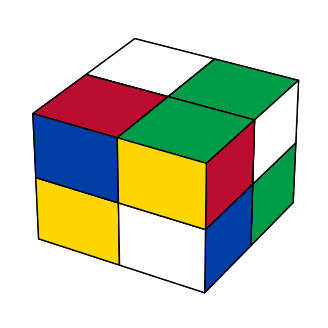

Cube4 after solving


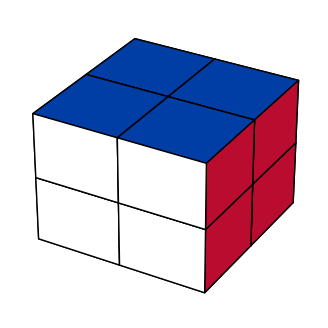

In [75]:
TestFunction(astar)